# Guided Project: Predicting Bike Rentals

Many American cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.

Hadi Fanaee-T at the University of Porto compiled this data into a CSV file, which you'll be working with in this project. The file contains `17380` rows, with each row representing the number of bike rentals for a single hour of a single day. You can download the data from [the University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

Here are the descriptions for the relevant columns:

* `instant` - A unique sequential ID number for each row
* `dteday` - The date of the rentals
* `season` - The season in which the rentals occurred
* `yr` - The year the rentals occurred
* `mnth` - The month the rentals occurred
* `hr` - The hour the rentals occurred
* `holiday` - Whether or not the day was a holiday
* `weekday` - The day of the week (as a number, `0` to `7`)
* `workingday` - Whether or not the day was a working day
* `weathersit` - The weather (as a categorical variable)
* `temp` - The temperature, on a `0-1` scale
* `atemp` - The adjusted temperature
* `hum` - The humidity, on a `0-1` scale
* `windspeed` - The wind speed, on a `0-1` scale
* `casual` - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
* `registered` - The number of registered riders (people who had already signed up)
* `cnt` - The total number of bike rentals (`casual` + `registered`)


In this project, I'll try to predict the total number of bikes people rented in a given hour. I'll predict the cnt column using all of the other columns, except for casual and registered. To accomplish this, I'll create a few different machine learning models and evaluate their performance.

In [1]:
# import model

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

In [2]:
#read data
bike_data=pd.read_csv('bike_rental_hour.csv')
bike_data.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [3]:
bike_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
bike_data.shape

(17379, 17)

Text(0.5, 1.0, 'Distribution of the cnt column of bike_rentals')

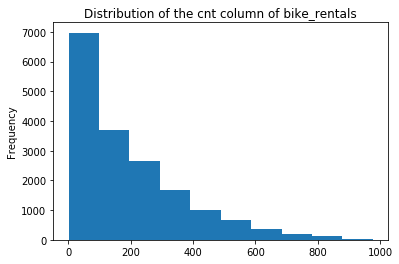

In [5]:
# Make a histogram of the cnt column of bike_rentals
bike_data['cnt'].plot(kind='hist')
plt.title('Distribution of the cnt column of bike_rentals')

We can find the distribution of cnt is right skewed. Almost number of bike_rental is between 0-400. Next, we will see which features has high correlations with cnt.

In [6]:
# explore how each column is correlated with cnt
corr_cnt=abs(bike_data.corr()['cnt']).sort_values(ascending=False)
corr_cnt

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
hum           0.322911
instant       0.278379
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
Name: cnt, dtype: float64

We can find the `registered`, `casual`, `temp`, `atemp`, `hr` are the top 5 high correlated features with `cnt`. However, we will not cinsider the `registered`, `casual` features because `cnt` is sum of `registered` and `casual`.

## Modify the Time Labels

It can often be helpful to calculate features before applying machine learning models. Features can enhance the accuracy of models by introducing new information, or distilling existing information.

For example, the `hr` column in `bike_rentals` contains the hours during which bikes are rented, from `1` to `24`. A machine will treat each hour differently, without understanding that certain hours are related. We can introduce some order into the process by creating a new column with labels for `morning`, `afternoon`, `evening`, and `night`. This will bundle similar times together, enabling the model to make better decisions.

In [7]:
# Write a function to modify time labels
def assign_label(hour):
    if 6<=hour<12:
        return 1
    elif 12<=hour<18:
        return 2
    elif 18<=hour<24:
        return 3
    else:
        return 4

In [8]:
# apply function to hr column
bike_data['time_label']=bike_data['hr'].apply(assign_label)
bike_data['time_label'].value_counts()

2    4375
3    4368
1    4360
4    4276
Name: time_label, dtype: int64

In [9]:
# explore how each column is correlated with cnt
corr_cnt=abs(bike_data.corr()['cnt']).sort_values(ascending=False)
corr_cnt

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
time_label    0.378318
hum           0.322911
instant       0.278379
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
Name: cnt, dtype: float64

We can see when we transfer `hr` column to `time_label` column, the correlations with `cnt` is decrease from 0.39 to 0.38, it is make sense because we classify 24 unique values to 4 groups. But it's also high related, so we can drop `hr` columns.

In [10]:
bike_data=bike_data.drop(columns='hr')
bike_data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


## Train and Test data sets

Before begin applying machine learning algorithms, I'll need to split the data into training and testing sets. This will enable to train an algorithm using the training set, and evaluate its accuracy on the testing set. If I train an algorithm on the training data, then evaluate its performance on the same data, I can get an unrealistically low error value, due to overfitting.

In [11]:
# split train and test data set
train_data=bike_data.sample(frac=0.8, random_state = 1)
test_data=bike_data.loc[~bike_data.index.isin(train_data.index)]

print(train_data.shape)
print(test_data.shape)

(13903, 17)
(3476, 17)


## Feature Selection
We will use feature correlation heatmap to filter the features that we won't be use.

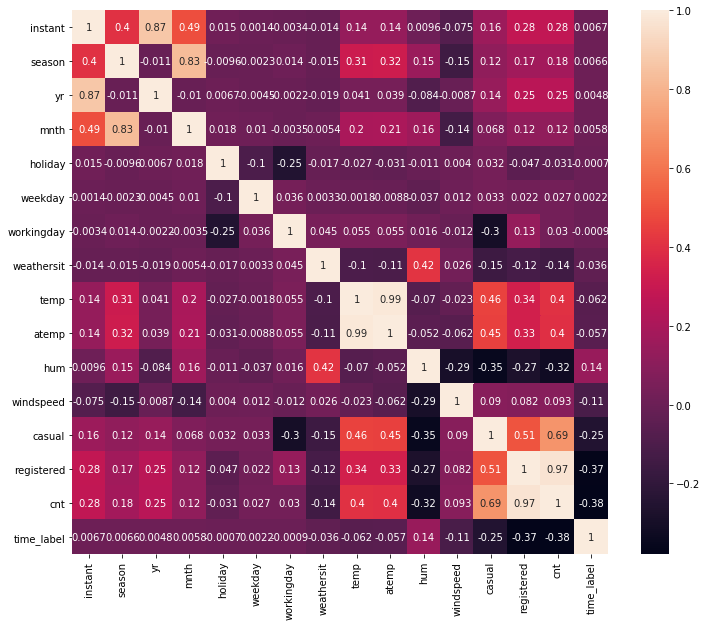

In [12]:
# heatmap of correlation
plt.figure(figsize=(12,10))
sns.heatmap(bike_data.corr(),annot=True)

we can filter the features that:
* `cnt`,`registered`,`casual` column should be removed.
* `temp`,`atemp` are high correlated, so we just select `temp` for prediction.
* `dteday` should be removed because its not numeric data and it's high related with `season`,`yr`,`month`,`holiday` columns.
* `instant` should be removed cause it's stand for ID.

In [13]:
# filter features
filter_cols=['cnt', 'casual', 'registered', 'atemp', 'dteday', 'instant']
features=bike_data.columns.drop(filter_cols)
features

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'time_label'],
      dtype='object')

## Error Matrix

I will use `RMSE: Root Mean Square Error` and `R2: R Square` as our error matrix.

* **RMSE**: The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. 

* **$R^2$**: R-squared has the useful property that its scale is intuitive: it ranges from zero to one, with zero indicating that the proposed model does not improve prediction over the mean model, and one indicating perfect prediction. 



## Machine Learning Algorithms
I will use the following three machine learning algorithms and compare their error:
* **Linear Regression Algorithm**
* **Decision Tree Algorithm**
* **Random Forest Algorithm**



### Linear Regression Algorithm
Linear regression works best when predictors are linearly correlated to the target and also independent -- in other words, they don't change meaning when we combine them with each other. The good thing about linear regression is that it's fairly resistant to overfitting because it's straightforward. It also can be prone to underfitting the data, however, and not building a powerful enough model. This means that linear regression usually isn't the most accurate option.

In [14]:
# linear regression model
def linear_regression(train, test, features,target):
    lr=LinearRegression()
    lr.fit(train[features],train[target])
    predictions=lr.predict(test[features])
    
    # error matrix
    mse=mean_squared_error(test[target],predictions)
    rmse=np.sqrt(mse)
    r2=r2_score(test[target],predictions)
    return rmse, r2



In [15]:
#test error
lr_test_error=linear_regression(train_data,test_data,features,'cnt')
lr_test_rmse=lr_test_error[0]
lr_test_r2=lr_test_error[1]

# train error
lr_train_error=linear_regression(train_data,train_data,features,'cnt')
lr_train_rmse=lr_train_error[0]
lr_train_r2=lr_train_error[1]

print('Linear Regression Model')
print('*************************')
print('the test/validation error is: (rmse: {0}, r2: {1})'.format(lr_test_rmse,lr_test_r2))
print('the train/bias error is: (rmse: {0}, r2: {1})'.format(lr_train_rmse,lr_train_r2))

Linear Regression Model
*************************
the test/validation error is: (rmse: 137.5541247292391, r2: 0.4032580169394715)
the train/bias error is: (rmse: 139.50354323933254, r2: 0.41372485839533235)


The error of train and test data are both high so that means the linear regression model are underfiting. The reason is that our model are very simple or too many outerlier data for rent cars.

### Decision Tree Algorithm

Decision trees tend to predict outcomes much more reliably than linear regression models. Because a decision tree is a fairly complex model, it also tends to overfit, particularly when we don't tweak parameters like maximum depth and minimum number of samples per leaf. Decision trees are also prone to instability -- small changes in the input data can result in a very different output model.

In [16]:
# Decision Tree Model
def decision_tree(train,test,features,target, min_samples_leaf=2,max_depth = None):
    dtr=DecisionTreeRegressor(random_state=1,min_samples_leaf=min_samples_leaf,max_depth = max_depth)
    dtr.fit(train[features],train[target])
    predictions=dtr.predict(test[features])
    
    #error matrix
    mse=mean_squared_error(test[target],predictions)
    rmse=np.sqrt(mse)
    r2=r2_score(test[target],predictions)
    return rmse, r2

In [17]:
# test error
dtr_test_error=decision_tree(train_data,test_data,features,'cnt')
dtr_test_rmse=dtr_test_error[0]
dtr_test_r2=dtr_test_error[1]

# train error
dtr_train_error=decision_tree(train_data,train_data,features,'cnt')
dtr_train_rmse=dtr_train_error[0]
dtr_train_r2=dtr_train_error[1]

print('Decision Tree Model')
print('*************************')
print('the test/validation error is: (rmse: {0}, r2: {1})'.format(dtr_test_rmse,dtr_test_r2))
print('the train/bias error is: (rmse: {0}, r2: {1})'.format(dtr_train_rmse,dtr_train_r2))

Decision Tree Model
*************************
the test/validation error is: (rmse: 132.9801017414426, r2: 0.4422845451225055)
the train/bias error is: (rmse: 54.9706363434719, r2: 0.9089683253253015)


According to result above, we can see that the error for both test and train data are decrease when compare linear regression model. However, the train/bias error are much smaller than test/validation error, which indicated the model make better performance on train data than test data, that lead overfitting. So, next we will adjust feature like `min_samples_leaf` to prune overfitting.

In [18]:
# adjust min_samples_leaf to modify decison tree model
dtr_test_rmses={}
dtr_train_rmses={}
for i in range(2,30,1):
    train_error=decision_tree(train_data,train_data,features,'cnt',min_samples_leaf=i)
    test_error=decision_tree(train_data,test_data,features,'cnt',min_samples_leaf=i)
    dtr_train_rmses[i]=train_error[0]
    dtr_test_rmses[i]=test_error[0]
    

    
    

In [19]:
print('Test rmses: ',dtr_test_rmses)
print('\n')
print('Train rmses: ', dtr_train_rmses)

Test rmses:  {2: 132.9801017414426, 3: 130.17696732189185, 4: 124.4787945148405, 5: 123.56878198432094, 6: 121.65290039059155, 7: 121.74011856527146, 8: 120.71847279527795, 9: 119.53231436876405, 10: 118.45423724093753, 11: 118.25835933153064, 12: 117.75023881964857, 13: 116.22537128468214, 14: 116.07478805497192, 15: 115.40223247425675, 16: 115.14642751122906, 17: 115.02820948642002, 18: 115.35695462892988, 19: 115.0779892438346, 20: 115.17880656843205, 21: 115.89650810215312, 22: 115.46023816258023, 23: 115.09552652359858, 24: 115.15581187314493, 25: 115.24300508373142, 26: 115.28328189300855, 27: 115.0929979871871, 28: 115.08851795079644, 29: 114.98962904457946}


Train rmses:  {2: 54.9706363434719, 3: 70.37750483931147, 4: 78.80388287033732, 5: 84.08209340943203, 6: 87.6894770681529, 7: 90.56946036457951, 8: 92.74296506843676, 9: 95.13041914354034, 10: 96.96092157137404, 11: 98.17469449026517, 12: 99.14947661168107, 13: 100.19560540780066, 14: 101.06869524467804, 15: 101.6017143210

Text(0.5, 1.0, 'Error of Decision Tree Regression with changing min_samples_leaf"')

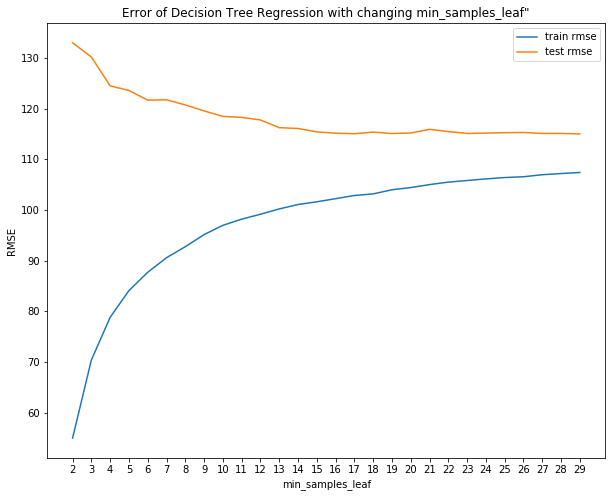

In [20]:
# lets visulalize test and train error
plt.figure(figsize=(10,8))
x=range(2,30,1)
y1=list(dtr_train_rmses.values())
y2=list(dtr_test_rmses.values())
plt.plot(x,y1,label='train rmse')
plt.plot(x,y2,label='test rmse')
plt.legend()
plt.xlabel('min_samples_leaf')
plt.ylabel('RMSE')
plt.xticks(x)
plt.title('Error of Decision Tree Regression with changing min_samples_leaf"')


According to figure above, if we want to trade off low bias error and low validation error, we will select min_samples_leaf as 30. Even if ,the rmse errors are also bigger on test and train data.

In [21]:
# set min_samples_leaf=30
# test error
dtr_test_error=decision_tree(train_data,test_data,features,'cnt',min_samples_leaf=30)
dtr_test_rmse=dtr_test_error[0]
dtr_test_r2=dtr_test_error[1]

# train error
dtr_train_error=decision_tree(train_data,train_data,features,'cnt',min_samples_leaf=30)
dtr_train_rmse=dtr_train_error[0]
dtr_train_r2=dtr_train_error[1]

print('Decision Tree Model')
print('*************************')
print('the test/validation error is: (rmse: {0}, r2: {1})'.format(dtr_test_rmse,dtr_test_r2))
print('the train/bias error is: (rmse: {0}, r2: {1})'.format(dtr_train_rmse,dtr_train_r2))

Decision Tree Model
*************************
the test/validation error is: (rmse: 114.94441227009158, r2: 0.583308073840701)
the train/bias error is: (rmse: 107.61351136311657, r2: 0.6511292102992445)


**RMSE Error** and **R2 Error** are still not to reach our expections. And the model also overfitting a little. Next, we will keep the `min_samples_leaf` and adjust `max_depth`.

In [22]:
# adjust max_depth to modify decison tree model
dtr_test_rmses={}
dtr_train_rmses={}
for i in range(2,30,1):
    train_error=decision_tree(train_data,train_data,features,'cnt',min_samples_leaf=30,max_depth=i)
    test_error=decision_tree(train_data,test_data,features,'cnt',min_samples_leaf=30,max_depth=i)
    dtr_train_rmses[i]=train_error[0]
    dtr_test_rmses[i]=test_error[0]
    

In [23]:
print('Test rmses: ',dtr_test_rmses)
print('\n')
print('Train rmses: ', dtr_train_rmses)

Test rmses:  {2: 139.44792640053726, 3: 131.37123832971537, 4: 125.81885810688732, 5: 123.71571653582981, 6: 121.82822781395811, 7: 118.04602197830421, 8: 116.37399812066246, 9: 115.10475762131495, 10: 115.17487109948917, 11: 114.64147878137419, 12: 115.19404225417873, 13: 115.1485310624994, 14: 114.9525543542074, 15: 114.9453688969245, 16: 114.94441227009158, 17: 114.94441227009158, 18: 114.94441227009158, 19: 114.94441227009158, 20: 114.94441227009158, 21: 114.94441227009158, 22: 114.94441227009158, 23: 114.94441227009158, 24: 114.94441227009158, 25: 114.94441227009158, 26: 114.94441227009158, 27: 114.94441227009158, 28: 114.94441227009158, 29: 114.94441227009158}


Train rmses:  {2: 143.7432632668408, 3: 134.17905253511753, 4: 127.88416929495193, 5: 124.38461377095174, 6: 121.44384348553078, 7: 117.2874086332591, 8: 114.35205098596899, 9: 111.82825455313902, 10: 110.14112352887136, 11: 109.0103825502797, 12: 108.04198577577563, 13: 107.75072282124776, 14: 107.63405188566033, 15: 107

Text(0.5, 1.0, 'Error of Decision Tree Regression with changing max_depth"')

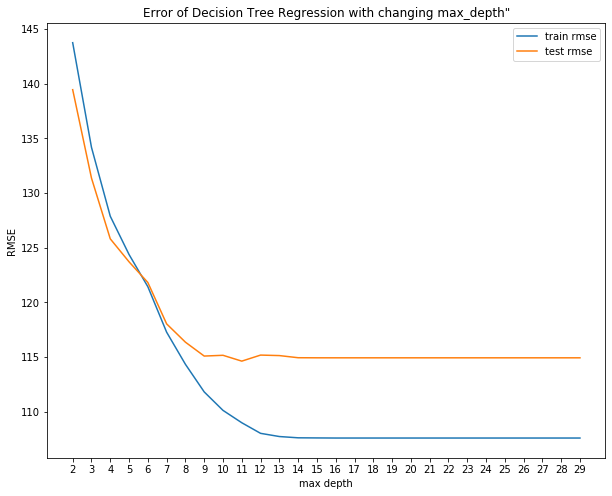

In [24]:
# lets visulalize test and train error
plt.figure(figsize=(10,8))
x=range(2,30,1)
y1=list(dtr_train_rmses.values())
y2=list(dtr_test_rmses.values())
plt.plot(x,y1,label='train rmse')
plt.plot(x,y2,label='test rmse')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('RMSE')
plt.xticks(x)
plt.title('Error of Decision Tree Regression with changing max_depth"')

We can find that the trade off point is that the `max_depth`=6. But RMSE are also bigger.In addition, for test error, rmse=115 seems to be the lowest possible test error.

In [25]:
# set min_samples_leaf=30
# test error
dtr_test_error=decision_tree(train_data,test_data,features,'cnt',min_samples_leaf=30,max_depth=6)
dtr_test_rmse=dtr_test_error[0]
dtr_test_r2=dtr_test_error[1]

# train error
dtr_train_error=decision_tree(train_data,train_data,features,'cnt',min_samples_leaf=30, max_depth=6)
dtr_train_rmse=dtr_train_error[0]
dtr_train_r2=dtr_train_error[1]

print('Decision Tree Model')
print('*************************')
print('the test/validation error is: (rmse: {0}, r2: {1})'.format(dtr_test_rmse,dtr_test_r2))
print('the train/bias error is: (rmse: {0}, r2: {1})'.format(dtr_train_rmse,dtr_train_r2))

Decision Tree Model
*************************
the test/validation error is: (rmse: 121.82822781395811, r2: 0.5319036969715569)
the train/bias error is: (rmse: 121.44384348553078, r2: 0.5556941715630297)


The descion tree model have a liitle better performance than linear regression, Next we will try use random forest algorithm to improve our model.

### Random Forest Algorithm

Random forests tend to be much more accurate than simple models like linear regression. Due to the way random forests are constructed, they tend to overfit much less than decision trees. Random forests can still be prone to overfitting, though, so it's important to tune parameters like maximum depth and minimum samples per leaf.

In [26]:
# random forest model
def random_forest(train, test, features, target, min_samples_leaf=2, max_depth = None):
    rf=RandomForestRegressor(random_state=1, min_samples_leaf=min_samples_leaf, max_depth = max_depth)
    rf.fit(train[features],train[target])
    predictions=rf.predict(test[features])
    
    # error matrix
    mse = mean_squared_error(test[target], predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(test[target], predictions)
    return rmse, r2

In [27]:
# test error
rf_test_error=random_forest(train_data,test_data,features,'cnt')
rf_test_rmse=rf_test_error[0]
rf_test_r2=rf_test_error[1]

# train error
rf_train_error=random_forest(train_data,train_data,features,'cnt')
rf_train_rmse=rf_train_error[0]
rf_train_r2=rf_train_error[1]

print('Random Forest Model')
print('*************************')
print('the test/validation error is: (rmse: {0}, r2: {1})'.format(rf_test_rmse,rf_test_r2))
print('the train/bias error is: (rmse: {0}, r2: {1})'.format(rf_train_rmse,rf_train_r2))

Random Forest Model
*************************
the test/validation error is: (rmse: 107.88458039363816, r2: 0.6329222076328826)
the train/bias error is: (rmse: 61.54163314905986, r2: 0.885904362925732)


In [28]:
# adjust max_depth to improve model
rf_test_rmses={}
rf_train_rmse={}
for i in range(2,31,1):
    test_error=random_forest(train_data,test_data,features,'cnt', max_depth=i)
    train_error=random_forest(train_data,train_data,features,'cnt',max_depth=i)
    rf_test_rmses[i]=test_error[0]
    rf_train_rmse[i]=train_error[0]
    
print('rf_test_rmses: ',rf_test_rmses)
print('\n')
print('rf_train_rmse: ',rf_train_rmse)

rf_test_rmses:  {2: 138.82369217828622, 3: 130.77775883572366, 4: 123.97062557062172, 5: 120.36110731709637, 6: 117.97235892813634, 7: 114.91844966754994, 8: 112.30315680183011, 9: 110.29147470783833, 10: 108.78902072646989, 11: 107.69161466277077, 12: 107.2896044890214, 13: 107.11302582609252, 14: 107.21992606012022, 15: 107.2280675986411, 16: 107.36830329283345, 17: 107.43471054664921, 18: 107.53356705412627, 19: 107.65480167862562, 20: 107.76082017870482, 21: 107.78862815269723, 22: 107.7514790845806, 23: 107.8034851431418, 24: 107.78004743596838, 25: 107.86945490458452, 26: 107.88469311243884, 27: 107.8765615352296, 28: 107.88093913941822, 29: 107.89297305084847, 30: 107.89048997922819}


rf_train_rmse:  {2: 143.1676422516666, 3: 133.57166248939515, 4: 126.35628848754871, 5: 122.06832006262667, 6: 118.41565372464174, 7: 114.3075240974464, 8: 110.0009601802127, 9: 105.30275666842776, 10: 99.96132848230799, 11: 94.15101721131468, 12: 88.0136508077564, 13: 82.01256203203555, 14: 76.66

Text(0.5, 1.0, 'Error of Decision Tree Regression with changing max_depth"')

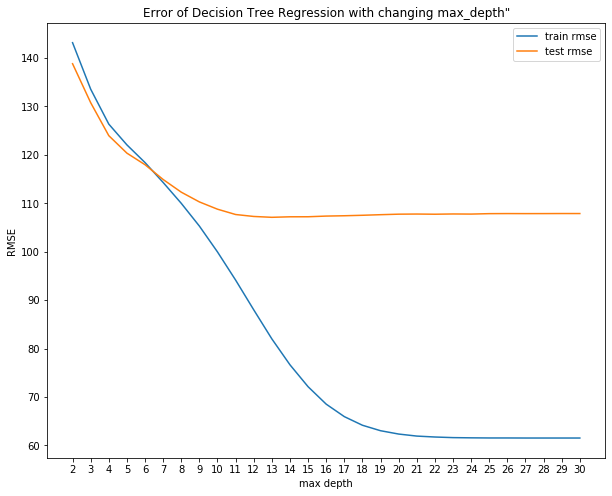

In [29]:
# lets visulalize test and train error
plt.figure(figsize=(10,8))
x=range(2,31,1)
y1=list(rf_train_rmse.values())
y2=list(rf_test_rmses.values())
plt.plot(x,y1,label='train rmse')
plt.plot(x,y2,label='test rmse')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('RMSE')
plt.xticks(x)
plt.title('Error of Decision Tree Regression with changing max_depth')

In [30]:
# adjust min_samples_leaf and fixed max_depth=6 to improve model
rf_test_rmses={}
rf_train_rmse={}
for i in range(2,31,1):
    test_error=random_forest(train_data,test_data,features,'cnt',min_samples_leaf=i, max_depth=6)
    train_error=random_forest(train_data,train_data,features,'cnt',min_samples_leaf=i, max_depth=6)
    rf_test_rmses[i]=test_error[0]
    rf_train_rmse[i]=train_error[0]
    
print('rf_test_rmses: ',rf_test_rmses)
print('\n')
print('rf_train_rmse: ',rf_train_rmse)

rf_test_rmses:  {2: 117.97235892813634, 3: 117.96393276005772, 4: 117.96495418212456, 5: 117.9635558976305, 6: 117.9638312698022, 7: 117.96275620357004, 8: 117.96437029190398, 9: 117.96615835843522, 10: 117.9624343379747, 11: 117.95312238861331, 12: 117.94670477019561, 13: 117.9437739311582, 14: 117.93841821073507, 15: 117.93543309259347, 16: 117.9345733793825, 17: 117.93787648517035, 18: 117.9335182099296, 19: 117.93049909572453, 20: 117.93240815531315, 21: 117.9393338161772, 22: 117.94128881554731, 23: 117.94385068949411, 24: 117.94374896983484, 25: 117.94432012506071, 26: 117.9447080062715, 27: 117.94666486355298, 28: 117.94987705434436, 29: 117.9546935617565, 30: 117.95490546619368}


rf_train_rmse:  {2: 118.41565372464174, 3: 118.41335949714289, 4: 118.41593679694955, 5: 118.41817388247728, 6: 118.41917989145779, 7: 118.42092891713872, 8: 118.42149935485142, 9: 118.42340686053758, 10: 118.42835039180036, 11: 118.43190551540816, 12: 118.43641622415993, 13: 118.44017423953284, 14: 1

Text(0.5, 1.0, 'Error of Decision Tree Regression with changing min_samples_leaf')

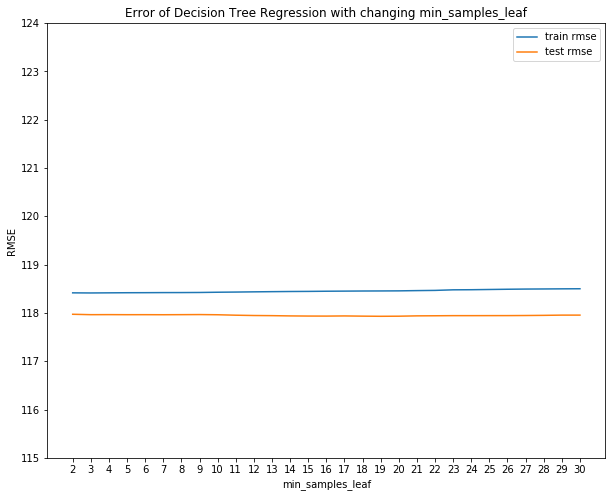

In [33]:
# lets visulalize test and train error
plt.figure(figsize=(10,8))
x=range(2,31,1)
y1=list(rf_train_rmse.values())
y2=list(rf_test_rmses.values())
plt.plot(x,y1,label='train rmse')
plt.plot(x,y2,label='test rmse')
plt.legend()
plt.xlabel('min_samples_leaf')
plt.ylabel('RMSE')
plt.xticks(x)
plt.yticks(range(115,125,1))
plt.title('Error of Decision Tree Regression with changing min_samples_leaf')

It seems like changing `min_samples_leaf` have no influence on test and train error. Lastly, we will adjust max_depth to imporve our random forest model.

In [37]:
# test error
rf_test_error=random_forest(train_data,test_data,features,'cnt',min_samples_leaf=5,max_depth=6)
rf_test_rmse=rf_test_error[0]
rf_test_r2=rf_test_error[1]

# train error
rf_train_error=random_forest(train_data,train_data,features,'cnt',min_samples_leaf=5,max_depth=6)
rf_train_rmse=rf_train_error[0]
rf_train_r2=rf_train_error[1]

print('Random Forest Model')
print('*************************')
print('the test/validation error is: (rmse: {0}, r2: {1})'.format(rf_test_rmse,rf_test_r2))
print('the train/bias error is: (rmse: {0}, r2: {1})'.format(rf_train_rmse,rf_train_r2))

Random Forest Model
*************************
the test/validation error is: (rmse: 117.9635558976305, r2: 0.5611308347673548)
the train/bias error is: (rmse: 118.41817388247728, r2: 0.5775573846572084)


The random forest model make a little better performance but still far from enough. Maybe we will try to scale features that may improve our predictions.


## Conclusion

By removing some of the sources of overfitting, the random forest accuracy is improved over the decision tree and linear regression accuracy. However, the  predictive of model still not reach our expections, here are some tips for further research:
* Apply feature scaling method
* Feature selections should be imporved, include `instant` columns.
* Predict `causal` and `registered` separately, not sum of them.